In [1]:
#import distance # for hamming dist
#import imagehash
import cv2
import matplotlib.pyplot as plt
import numpy as np
from   PIL import Image
import scipy.spatial

In [2]:
!ls ../..

README.md         img               mastering_with_tf


In [3]:
IMG = '../../img'

In [4]:
me = Image.open(f'{IMG}/me.jpg')
matt = Image.open(f'{IMG}/matt.jpg')

In [5]:
#me

In [6]:
#matt

In [7]:
#hash_me = imagehash.phash(me) # 'perpetual hash (cos transform)'
#hash_matt = imagehash.phash(matt)
#scipy.spatial.distance.hamming(hash_me, hash_matt)

### Creating an Image Vector

In [8]:
#plt.imshow(me);

In [9]:
img_arr = np.asarray(me)
img_arr.shape

(238, 238, 3)

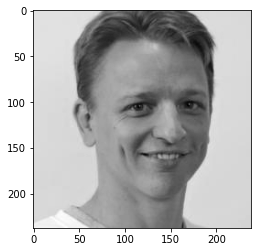

In [10]:
grey = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
plt.imshow(grey, cmap='gray');

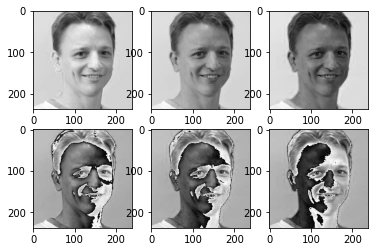

In [11]:
plt.subplot(231)
plt.imshow(img_arr[:, :, 0], cmap='gray')
plt.subplot(232)
plt.imshow(img_arr[:, :, 1], cmap='gray')
plt.subplot(233)
plt.imshow(img_arr[:, :, 2], cmap='gray')
plt.subplot(234)
plt.imshow(img_arr[:, :, 0] + img_arr[:, :, 1], cmap='gray')
plt.subplot(235)
plt.imshow(img_arr[:, :, 0] + img_arr[:, :, 2], cmap='gray')
plt.subplot(236)
plt.imshow(img_arr[:, :, 1] + img_arr[:, :, 2], cmap='gray');

### Convolution with Kernels

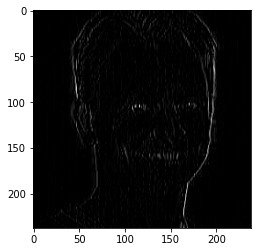

In [12]:
kernel = np.array([[-1, 2, -1],
                   [-1, 2, -1],
                   [-1, 2, -1]])
vert_img = cv2.filter2D(grey, -1, kernel)
plt.imshow(vert_img, cmap='gray');

### Smoothing
Mean, Median, and Gaussian filters

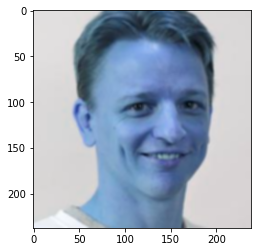

In [13]:
img = cv2.imread(f'{IMG}/me.jpg')
plt.imshow(cv2.blur(img, (3, 3))); # RGB -> BGR in CV (median 3x3 filter)

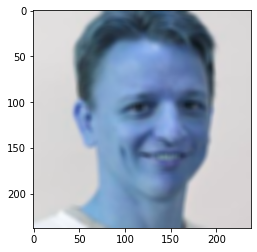

In [14]:
plt.imshow(cv2.blur(img, (6, 6)));

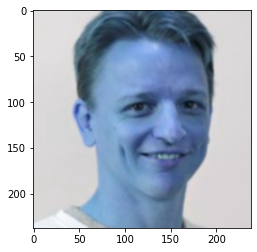

In [15]:
plt.imshow(cv2.GaussianBlur(img, (3, 3), 1));

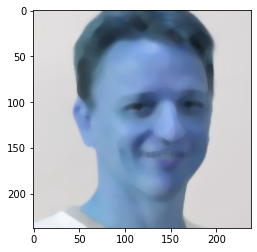

In [16]:
plt.imshow(cv2.medianBlur(img, 9));

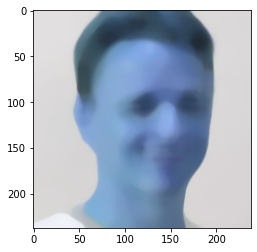

In [17]:
plt.imshow(cv2.medianBlur(img, 19));

### Sobel Edge Detector

In [18]:
sobel_x = cv2.Sobel(grey, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(grey, cv2.CV_64F, 0, 1, ksize=5)
mag, direction = cv2.cartToPolar(sobel_x, sobel_y, angleInDegrees=True)
sobel_G = np.hypot(sobel_x, sobel_y)

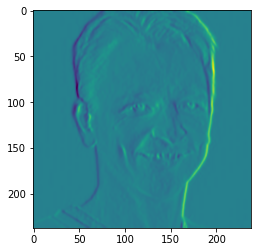

In [26]:
plt.imshow(sobel_x);

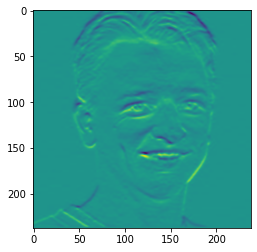

In [27]:
plt.imshow(sobel_y);

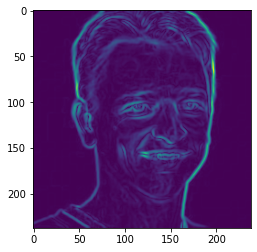

In [21]:
plt.imshow(mag);

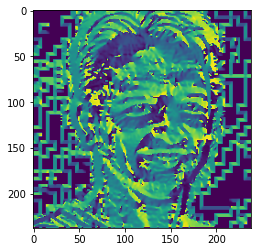

In [23]:
plt.imshow(direction);

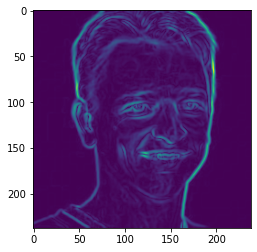

In [25]:
plt.imshow(sobel_G);

### Canny Edge Detector

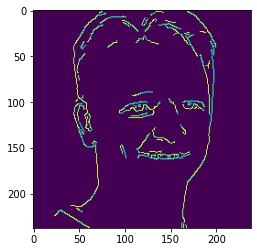

In [37]:
canny = cv2.Canny(grey, 100, 200)
plt.imshow(canny);